In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.applications.resnet import  ResNet50
from tensorflow.keras.layers import Input , UpSampling2D , GlobalAveragePooling2D , Flatten , Dense , BatchNormalization
from tensorflow.nn import relu , softmax
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline
import random

In [51]:
(train_images , train_label) , (test_images , test_label) = load_data()

In [52]:
print("Shape of train_images is : ",train_images.shape)
print("Shape of train_label is : ",train_label.shape)
print("Shape of test_images is : ",test_images.shape)
print("Shape of test_label is : ",test_label.shape)

Shape of train_images is :  (50000, 32, 32, 3)
Shape of train_label is :  (50000, 1)
Shape of test_images is :  (10000, 32, 32, 3)
Shape of test_label is :  (10000, 1)


In [53]:
train_label = tf.keras.utils.to_categorical(train_label)
test_label  = tf.keras.utils.to_categorical(test_label)

print("Shape of train_images is : ",train_images.shape)
print("Shape of train_label is : ",train_label.shape)
print("Shape of test_images is : ",test_images.shape)
print("Shape of test_label is : ",test_label.shape)

Shape of train_images is :  (50000, 32, 32, 3)
Shape of train_label is :  (50000, 10)
Shape of test_images is :  (10000, 32, 32, 3)
Shape of test_label is :  (10000, 10)


In [54]:
train_images = train_images.astype('float64')
train_data   = tf.keras.applications.resnet50.preprocess_input(train_images)
test_images  = test_images.astype('float64')
test_data    = tf.keras.applications.resnet50.preprocess_input(test_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


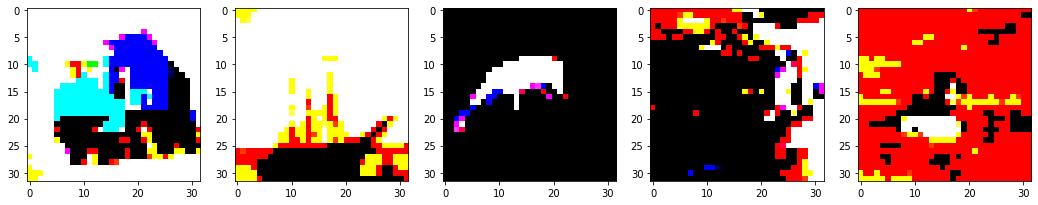

In [55]:
fig , ax = plt.subplots(1,5,figsize=(18,4))
for i in range(5):
    ax[i].imshow(train_data[random.randint(0,500)])

In [56]:
# Create or Initialize the resnet block
pre_trained_model = ResNet50(
    include_top=False ,
    weights='imagenet',
    input_shape=(224,224,3)
)

layer_name = "conv5_block3_2_bn"
trainable  = False
for layer in pre_trained_model.layers:
    if layer.name == layer_name:
        print("Layer name is : %s"%(layer.name))
        trainable = True
    layer.trainable = trainable

# Add Inputs , flatten and classsifier layer

inputs = Input(shape = (32,32,3))
x = UpSampling2D((7,7))(inputs)
x = pre_trained_model(x)
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024 , activation = relu)(x)
x = BatchNormalization()(x)
x = Dense(512 , activation = relu)(x)
x = BatchNormalization()(x)
output = Dense(10 , activation=softmax)(x)

model = Model(inputs , output)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=0.0001) ,
    loss=tf.keras.losses.categorical_crossentropy ,
    metrics=['acc']
)

Layer name is : conv5_block3_2_bn


In [57]:
history = model.fit(
    train_data,
    train_label,
    epochs=5,
    validation_data = (test_data , test_label)
)

Epoch 1/5
1563/1563 [==============================] - 196s 123ms/step - loss: 0.8681 - acc: 0.7123 - val_loss: 0.5523 - val_acc: 0.8140
Epoch 2/5
1563/1563 [==============================] - 196s 125ms/step - loss: 0.4261 - acc: 0.8533 - val_loss: 0.5139 - val_acc: 0.8264
Epoch 3/5
1563/1563 [==============================] - 195s 125ms/step - loss: 0.3048 - acc: 0.8946 - val_loss: 0.4942 - val_acc: 0.8386
Epoch 4/5
1563/1563 [==============================] - 195s 125ms/step - loss: 0.2175 - acc: 0.9258 - val_loss: 0.5284 - val_acc: 0.8368
Epoch 5/5
1563/1563 [==============================] - 195s 125ms/step - loss: 0.1556 - acc: 0.9487 - val_loss: 0.5679 - val_acc: 0.8359


In [58]:
# Create or Initialize the resnet block
pre_trained_model = ResNet50(
    include_top=False ,
    weights='imagenet',
    input_shape=(224,224,3)
)

# Add Inputs , flatten and classsifier layer

inputs = Input(shape = (32,32,3))
x = UpSampling2D((7,7))(inputs)
x = pre_trained_model(x)
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024 , activation = relu)(x)
x = BatchNormalization()(x)
x = Dense(512 , activation = relu)(x)
x = BatchNormalization()(x)
output = Dense(10 , activation=softmax)(x)

model = Model(inputs , output)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=0.0001) ,
    loss=tf.keras.losses.categorical_crossentropy ,
    metrics=['acc']
)

history1 = model.fit(
    train_data,
    train_label,
    epochs=5,
    validation_data = (test_data , test_label)
)

Epoch 1/5
1563/1563 [==============================] - 561s 353ms/step - loss: 0.6391 - acc: 0.7928 - val_loss: 0.3359 - val_acc: 0.8953
Epoch 2/5
1563/1563 [==============================] - 552s 353ms/step - loss: 0.2065 - acc: 0.9323 - val_loss: 0.3174 - val_acc: 0.9065
Epoch 3/5
1563/1563 [==============================] - 552s 353ms/step - loss: 0.1226 - acc: 0.9597 - val_loss: 0.2836 - val_acc: 0.9150
Epoch 4/5
1563/1563 [==============================] - 552s 353ms/step - loss: 0.0813 - acc: 0.9724 - val_loss: 0.3454 - val_acc: 0.9160
Epoch 5/5
1563/1563 [==============================] - 552s 353ms/step - loss: 0.0633 - acc: 0.9791 - val_loss: 0.2575 - val_acc: 0.9314


Text(0.5, 1.0, 'Loss')

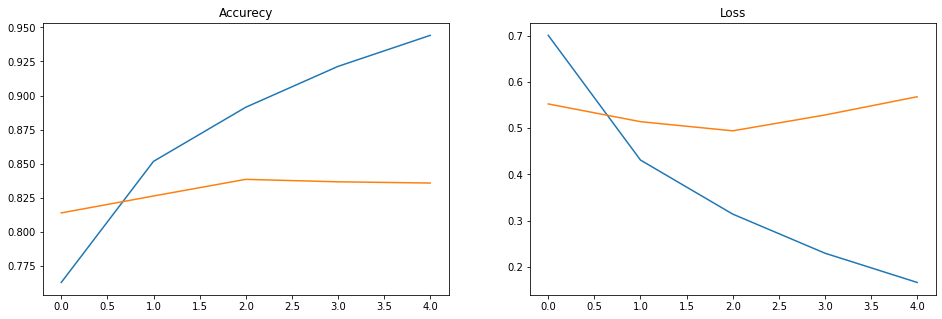

In [59]:
_ , ax = plt.subplots(1,2,figsize = (16,5))
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_title("Accurecy")

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title("Loss")

Text(0.5, 1.0, 'Loss')

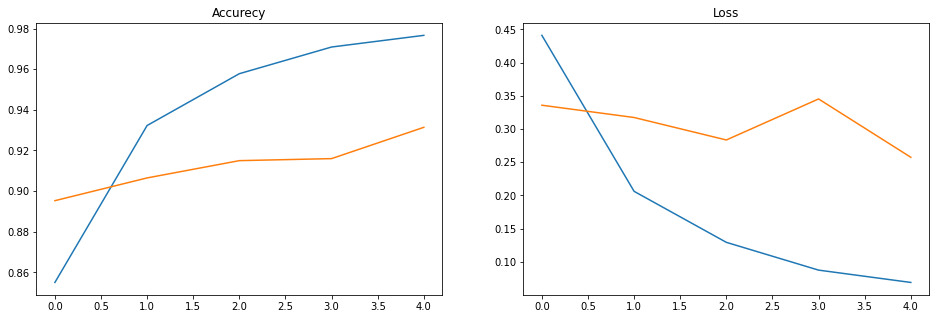

In [60]:
_ , ax = plt.subplots(1,2,figsize = (16,5))
ax[0].plot(history1.history['acc'])
ax[0].plot(history1.history['val_acc'])
ax[0].set_title("Accurecy")

ax[1].plot(history1.history['loss'])
ax[1].plot(history1.history['val_loss'])
ax[1].set_title("Loss")

In [61]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import urllib

In [62]:
frog_img_url = "https://static.scientificamerican.com/sciam/cache/file/41DF7DA0-EE58-4259-AA815A390FB37C55_source.jpg"
frog_img_name = "frog.jpg"
urllib.request.urlretrieve(frog_img_url , frog_img_name)

('frog.jpg', <http.client.HTTPMessage at 0x7f480d1f6630>)

In [64]:
frog_img = tf.keras.preprocessing.image.load_img(frog_img_name , target_size=(32,32,3))
frog_img = tf.keras.preprocessing.image.img_to_array(frog_img)
frog = tf.keras.applications.resnet50.preprocess_input(frog_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


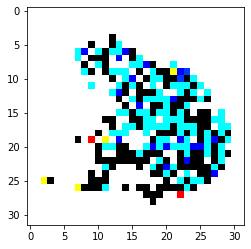

In [67]:
plt.imshow(frog)

In [70]:
pred = model.predict(frog[tf.newaxis,]).argmax()

In [71]:
classes[pred]

'frog'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'frog')

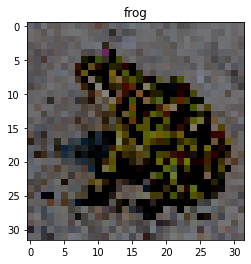

In [77]:
plt.imshow(frog_img.astype("float64") / 255.0)
plt.title(classes[pred])

<BarContainer object of 10 artists>

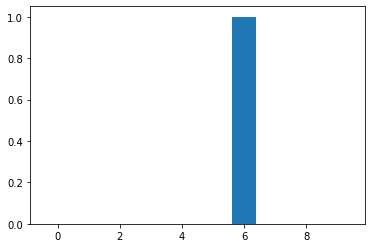

In [86]:
plt.bar(list(range(0,10)) , model.predict(frog[tf.newaxis,])[0])

In [101]:
def prediction(img_url):
    img_name = "img"+str(random.randint(0,1000))+".jpg"
    urllib.request.urlretrieve(img_url , img_name)
    img_ = tf.keras.preprocessing.image.load_img(img_name , target_size=(32,32,3))
    img_ = tf.keras.preprocessing.image.img_to_array(img_)
    img = tf.keras.applications.resnet50.preprocess_input(img_)

    p = model.predict(img[tf.newaxis,])
    pred = p.argmax()

    _ , ax = plt.subplots(1,2,figsize = (12,5))
    ax[0].imshow(img_.astype("float64") / 255.0)
    ax[0].set_title(classes[pred])

    ax[1].bar(list(range(0,10)) , p[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


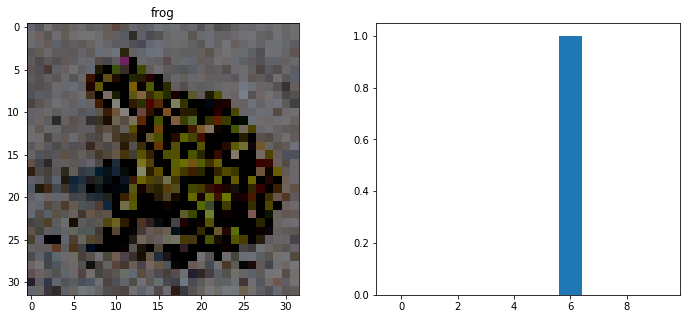

In [102]:
prediction("https://static.scientificamerican.com/sciam/cache/file/41DF7DA0-EE58-4259-AA815A390FB37C55_source.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


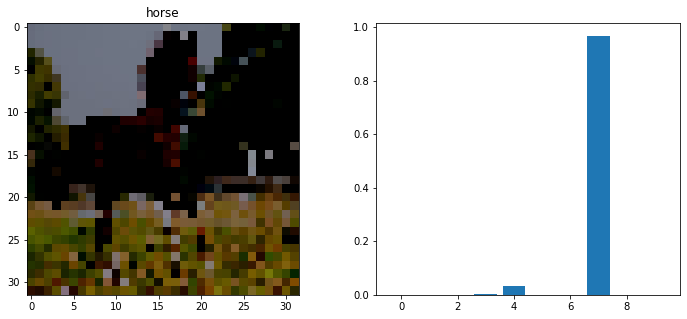

In [103]:
prediction("https://www.vet.upenn.edu/images/default-source/penn-vet-extra/2019/pve-2-19-nbc2.jpg?sfvrsn=8269eaba_0")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


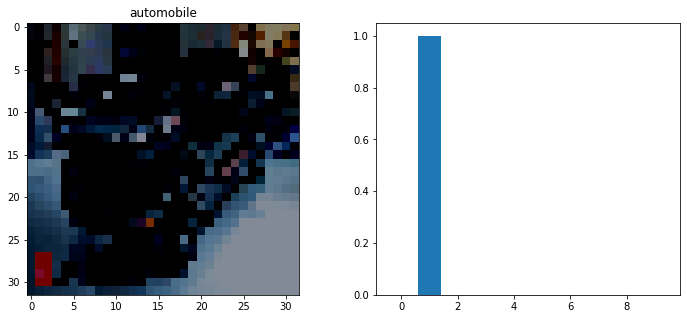

In [105]:
prediction("https://etimg.etb2bimg.com/thumb/msid-76805464,imgsize-369078,width-800,height-434,overlay-etauto/etauto-originals-will-china-fade-away-on-the-indian-automobile-turf.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


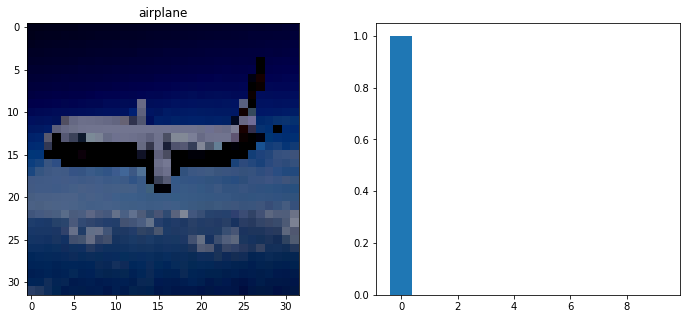

In [106]:
prediction("https://live.staticflickr.com/65535/48764060802_f4d4f052a2_o.jpg")